# National Hospital Dataset - Data Prep and Machine Learning exercise
Done to support an application during DragonHacks 2019 at Drexel University

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB

In [2]:
struct_df = pd.read_csv("Structural_Measures_-_Hospital.csv",dtype={'Provider ID': str})
struct_df.replace(["Not Available",""," "],np.nan,inplace=True)

In [3]:
struct_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Measure Response,Footnote,Measure Start Date,Measure End Date,Location
0,361313,MORROW COUNTY HOSPITAL,651 WEST MARION ROAD,MOUNT GILEAD,OH,43338,MORROW,(419) 946-5015,Patient Safety Culture,SM_HS_PATIENT_SAF,NaN,5 - Results are not available for this reporti...,01/01/2017,12/31/2017,"651 WEST MARION ROAD MOUNT GILEAD, OH 43338 (4..."
1,390183,ST LUKE'S MINERS MEMORIAL HOSPITAL,360 W RUDDLE STREET,COALDALE,PA,18218,SCHUYLKILL,(570) 645-2131,Safe surgery checklist use (inpatient),SM_SS_CHECK,Yes,NaN,01/01/2017,12/31/2017,"360 W RUDDLE STREET COALDALE, PA 18218 (40.821..."
2,231301,KALKASKA MEMORIAL HEALTH CENTER,419 S CORAL,KALKASKA,MI,49646,KALKASKA,(231) 258-7500,Safe surgery checklist use (inpatient),SM_SS_CHECK,NaN,5 - Results are not available for this reporti...,01/01/2017,12/31/2017,"419 S CORAL KALKASKA, MI 49646 (44.730897, -85..."
3,340143,CATAWBA VALLEY MEDICAL CENTER,810 FAIRGROVE CHURCH RD,HICKORY,NC,28602,CATAWBA,(828) 326-3809,Safe surgery checklist use (inpatient),SM_SS_CHECK,Yes,NaN,01/01/2017,12/31/2017,"810 FAIRGROVE CHURCH RD HICKORY, NC 28602 (35...."
4,371323,"WEATHERFORD REGIONAL HOSPITAL, INC OF WEATHERFORD",3701 E MAIN,WEATHERFORD,OK,73096,CUSTER,(580) 772-5551,Patient Safety Culture,SM_HS_PATIENT_SAF,NaN,5 - Results are not available for this reporti...,01/01/2017,12/31/2017,"3701 E MAIN WEATHERFORD, OK 73096 (35.536869, ..."


In [4]:
struct_df.shape

(23920, 15)

In [5]:
pay_df = pd.read_csv("Payment_and_value_of_care_-_Hospital.csv",dtype={'Provider ID': str,'ZIP Code': str})
pay_df.replace(["Not Available",""," "],np.nan,inplace=True)

In [6]:
pay_df.head(4)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,171312,COMANCHE COUNTY HOSPITAL,2ND & FRISCO STREET,COLDWATER,KS,67029,COMANCHE,(620) 582-2144,Payment for heart attack patients,PAYM_30_AMI,...,NaN,NaN,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,NaN,1 - The number of cases/patients is too few to...,07/01/2014,06/30/2017,"2ND &amp; FRISCO STREET COLDWATER, KS 67029"
1,171312,COMANCHE COUNTY HOSPITAL,2ND & FRISCO STREET,COLDWATER,KS,67029,COMANCHE,(620) 582-2144,Payment for heart failure patients,PAYM_30_HF,...,NaN,NaN,1 - The number of cases/patients is too few to...,Value of Care Heart Failure measure,MORT_PAYM_30_HF,NaN,1 - The number of cases/patients is too few to...,07/01/2014,06/30/2017,"2ND &amp; FRISCO STREET COLDWATER, KS 67029"
2,171312,COMANCHE COUNTY HOSPITAL,2ND & FRISCO STREET,COLDWATER,KS,67029,COMANCHE,(620) 582-2144,Payment for hip/knee replacement patients,PAYM_90_HIP_KNEE,...,NaN,NaN,5 - Results are not available for this reporti...,Value of Care hip/knee replacement measure,COMP_PAYM_90_HIP_KNEE,NaN,5 - Results are not available for this reporti...,04/01/2014,03/31/2017,"2ND &amp; FRISCO STREET COLDWATER, KS 67029"
3,171312,COMANCHE COUNTY HOSPITAL,2ND & FRISCO STREET,COLDWATER,KS,67029,COMANCHE,(620) 582-2144,Payment for pneumonia patients,PAYM_30_PN,...,"$18,143","$25,442",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and higher payment,NaN,07/01/2014,06/30/2017,"2ND &amp; FRISCO STREET COLDWATER, KS 67029"


In [7]:
pay_df.shape

(19136, 23)

In [8]:
general_df = pd.read_csv("Hospital_General_Information.csv",dtype={'Provider ID': str})
general_df.replace(["Not Available",""," "],np.nan,inplace=True)

general_df.loc[:,"Hospital overall rating"] = general_df.loc[:,"Hospital overall rating"].astype(float)

In [9]:
pay_df = pay_df.drop(['Location','Phone number'],axis=1);
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19136 entries, 0 to 19135
Data columns (total 21 columns):
Provider ID                   19136 non-null object
Hospital name                 19136 non-null object
Address                       19136 non-null object
City                          19136 non-null object
State                         19136 non-null object
ZIP Code                      19136 non-null object
County name                   19092 non-null object
Payment measure name          19136 non-null object
Payment measure ID            19136 non-null object
Payment category              16176 non-null object
Denominator                   12518 non-null object
Payment                       12518 non-null object
Lower estimate                12518 non-null object
Higher estimate               12518 non-null object
Payment footnote              6629 non-null object
Value of care display name    19136 non-null object
Value of care display ID      19136 non-null object
Value of

In [10]:
pay_df.loc[:,"Payment"] = pd.to_numeric(pay_df["Payment"].apply(lambda x: str(x).replace("$","").replace(",","")),errors='coerce')
pay_df.loc[:,"Lower estimate"] = pd.to_numeric(pay_df["Lower estimate"].apply(lambda x: str(x).replace("$","").replace(",","")),errors='coerce')
pay_df.loc[:,"Higher estimate"] = pd.to_numeric(pay_df["Higher estimate"].apply(lambda x: str(x).replace("$","").replace(",","")),errors='coerce')

pay_df['Payment'].head(8)

0        NaN
1        NaN
2        NaN
3    21772.0
4        NaN
5        NaN
6        NaN
7    20485.0
Name: Payment, dtype: float64

In [11]:
pay_df[["Payment","Lower estimate","Higher estimate"]].head(5)

,Payment,Lower estimate,Higher estimate
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,21772.0,18143.0,25442.0
4,NaN,NaN,NaN


In [12]:
pay_df_index = pay_df.iloc[:,:7]
pay_df_index.columns

Index(['Provider ID', 'Hospital name', 'Address', 'City', 'State', 'ZIP Code',
       'County name'],
      dtype='object')

## Get the Payment estimates out

In [13]:
# Payment itself
tf_pay = pay_df.pivot(index="Provider ID", columns='Payment measure name', values='Payment').reset_index()
# Lower Estimatetf_pay_l
tf_pay_l = pay_df.pivot(index="Provider ID", columns='Payment measure name', values='Lower estimate').reset_index()
# Lower Estimate
tf_pay_h = pay_df.pivot(index="Provider ID", columns='Payment measure name', values='Higher estimate').reset_index()

In [14]:
placehold = tf_pay.columns.tolist()
for index, text  in enumerate(tf_pay.columns[1:]):
    placehold[index+1] = str(text) + " - actual"
tf_pay.columns = placehold
tf_pay.head(1)

,Provider ID,Payment for heart attack patients - actual,Payment for heart failure patients - actual,Payment for hip/knee replacement patients - actual,Payment for pneumonia patients - actual
0,010001,23394.0,17041.0,25812.0,18281.0


In [15]:
placehold = tf_pay_l.columns.tolist()
for index, text  in enumerate(tf_pay_l.columns[1:]):
    placehold[index+1] = str(text) + " - lower"
tf_pay_l.columns = placehold
tf_pay_l.head(1)

,Provider ID,Payment for heart attack patients - lower,Payment for heart failure patients - lower,Payment for hip/knee replacement patients - lower,Payment for pneumonia patients - lower
0,010001,22216.0,16268.0,24704.0,17354.0


In [16]:
placehold = tf_pay_h.columns.tolist()
for index, text  in enumerate(tf_pay_h.columns[1:]):
    placehold[index+1] = str(text) + " - higher"
tf_pay_h.columns = placehold
tf_pay_h.head(1)

,Provider ID,Payment for heart attack patients - higher,Payment for heart failure patients - higher,Payment for hip/knee replacement patients - higher,Payment for pneumonia patients - higher
0,010001,24641.0,17849.0,26982.0,19236.0


## Get Value of Care Respond

In [17]:
df_value = pay_df.iloc[:,-6:-1]
df_value = pd.concat([pay_df_index,df_value],axis=1)
df_value.columns

Index(['Provider ID', 'Hospital name', 'Address', 'City', 'State', 'ZIP Code',
       'County name', 'Value of care display name', 'Value of care display ID',
       'Value of care category', 'Value of care footnote',
       'Measure start date'],
      dtype='object')

In [18]:
tf_value = df_value.pivot(index="Provider ID", columns='Value of care display ID', values='Value of care category').reset_index()
tf_value.rename(columns={'MORT_PAYM_30_AMI': 'MORT_PAYM_30_HEART ATT', 'MORT_PAYM_30_PN': 'MORT_PAYM_30_PNEU','MORT_PAYM_30_HF': 'MORT_PAYM_30_HEART FAIL'}, inplace=True)

In [19]:
tf_value.head(2)

Value of care display ID,Provider ID,COMP_PAYM_90_HIP_KNEE,MORT_PAYM_30_HEART ATT,MORT_PAYM_30_HEART FAIL,MORT_PAYM_30_PNEU
0,010001,Average complications and higher payment,Average mortality and average payment,Average mortality and average payment,Average mortality and average payment
1,010005,Average complications and average payment,Average mortality and average payment,Worse mortality and average payment,Worse mortality and lower payment


In [20]:
for col in tf_value[2:]:
    x = tf_value[str(col)].str.split('and', 1, expand=True)

In [21]:
lst_value_df = []
for item in tf_value.columns.tolist()[1:len(tf_value.columns)]:
#     print(item)
    df = tf_value[item].str.split('and', 1, expand=True)
    df.columns = [item + "_1",item + "_2"]
    lst_value_df.append(df)

In [22]:
lst_value_df.append(tf_value.iloc[:,:1])
# for i in lst_value_df:
tf_value_split = pd.concat(lst_value_df, axis=1)

In [23]:
tf_value_split.head(2)

,COMP_PAYM_90_HIP_KNEE_1,COMP_PAYM_90_HIP_KNEE_2,MORT_PAYM_30_HEART ATT_1,MORT_PAYM_30_HEART ATT_2,MORT_PAYM_30_HEART FAIL_1,MORT_PAYM_30_HEART FAIL_2,MORT_PAYM_30_PNEU_1,MORT_PAYM_30_PNEU_2,Provider ID
0,Average complications,higher payment,Average mortality,average payment,Average mortality,average payment,Average mortality,average payment,010001
1,Average complications,average payment,Average mortality,average payment,Worse mortality,average payment,Worse mortality,lower payment,010005


In [24]:
tf_value_split.iloc[:,2].unique()

array(['Average mortality ', nan, 'Worse mortality ', 'Better mortality '],
      dtype=object)

## Get Structural Measures

In [25]:
struct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23920 entries, 0 to 23919
Data columns (total 15 columns):
Provider ID           23920 non-null object
Hospital Name         23920 non-null object
Address               23920 non-null object
City                  23920 non-null object
State                 23920 non-null object
ZIP Code              23920 non-null int64
County Name           23865 non-null object
Phone Number          23920 non-null object
Measure Name          23920 non-null object
Measure ID            23920 non-null object
Measure Response      17818 non-null object
Footnote              6102 non-null object
Measure Start Date    23920 non-null object
Measure End Date      23920 non-null object
Location              23920 non-null object
dtypes: int64(1), object(14)
memory usage: 2.7+ MB


In [26]:
struct_df.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Measure Response,Footnote,Measure Start Date,Measure End Date,Location
0,361313,MORROW COUNTY HOSPITAL,651 WEST MARION ROAD,MOUNT GILEAD,OH,43338,MORROW,(419) 946-5015,Patient Safety Culture,SM_HS_PATIENT_SAF,NaN,5 - Results are not available for this reporti...,01/01/2017,12/31/2017,"651 WEST MARION ROAD MOUNT GILEAD, OH 43338 (4..."
1,390183,ST LUKE'S MINERS MEMORIAL HOSPITAL,360 W RUDDLE STREET,COALDALE,PA,18218,SCHUYLKILL,(570) 645-2131,Safe surgery checklist use (inpatient),SM_SS_CHECK,Yes,NaN,01/01/2017,12/31/2017,"360 W RUDDLE STREET COALDALE, PA 18218 (40.821..."


In [27]:
# Payment itself
tf_struct = struct_df.pivot(index="Provider ID", columns='Measure Name', values='Measure Response').reset_index()

In [28]:
tf_struct.head(1)

Measure Name,Provider ID,Able to receive lab results electronically,"Able to track patients' lab results, tests, and referrals electronically between visits",Patient Safety Culture,Safe surgery checklist use (inpatient),Safe surgery checklist use (outpatient)
0,010001,Yes,Yes,Yes,Yes,Yes


In [29]:
# tf_struct = tf_struct.replace({"Yes": 1,"No": 0})
# tf_struct.head(2)

## Get External Demographic Measures

In [30]:
income_df = pd.read_csv("16zpallagi.csv")

In [31]:
income_df.loc[:,"zipcode"] = income_df.loc[:,"zipcode"].astype(str).str.zfill(5)    
income_df.loc[:,"zipcode"] = income_df.loc[:,"zipcode"].apply(str)

In [32]:
income_df = income_df[['zipcode','agi_stub','N02650','A02650']]
income_df.head(10)

,zipcode,agi_stub,N02650,A02650
0,00000,1,815440,10787121
1,00000,2,495830,18020908
2,00000,3,263390,16351320
3,00000,4,167190,14646693
4,00000,5,217440,29696755
5,00000,6,57230,26303410
6,35004,1,1510,19675
7,35004,2,1410,52487
8,35004,3,950,59519
9,35004,4,650,56657


In [33]:
income_df_g = income_df.groupby(['zipcode'], as_index=False).sum()

In [34]:
income_df_g.head(10)

,zipcode,agi_stub,N02650,A02650
0,00000,1071,147025470,10396138255
1,01001,21,8980,512546
2,01002,21,9490,817846
3,01003,17,170,2474
4,01005,21,2370,139610
5,01007,21,7580,564832
6,01008,21,660,43355
7,01009,21,650,30807
8,01010,21,1880,136250
9,01011,21,650,34415


In [35]:
income_df_g.loc[:,'gross_inc_filer'] = income_df_g['A02650']/income_df_g['N02650']*1000

In [36]:
inc_df = income_df_g.loc[:,['zipcode','gross_inc_filer']]
inc_df.to_csv("x.csv")
inc_df.head(2)

,zipcode,gross_inc_filer
0,00000,70709.777394
1,01001,57076.391982


## Combine all dataframes

In [37]:
tf_index = pay_df_index.drop_duplicates()

In [38]:
# Start with Index
complete = tf_index

list_of_df = [tf_value_split,tf_struct,tf_pay,tf_pay_l,tf_pay_h,general_df]
for each in list_of_df:
    each.loc[:,'Provider ID'] = each.loc[:,'Provider ID'].apply(str)
for each in list_of_df:
    complete = complete.merge(each,on="Provider ID",how="left")

In [39]:
# Pull in income
complete = complete.merge(inc_df,left_on="ZIP Code", right_on="zipcode", how="left")
complete = complete.drop("zipcode", axis=1)

In [40]:
complete.set_index("Provider ID", inplace=True)

In [41]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4784 entries, 171312 to 150009
Data columns (total 38 columns):
Hospital name                                                                              4784 non-null object
Address                                                                                    4784 non-null object
City                                                                                       4784 non-null object
State                                                                                      4784 non-null object
ZIP Code                                                                                   4784 non-null object
County name                                                                                4773 non-null object
COMP_PAYM_90_HIP_KNEE_1                                                                    2735 non-null object
COMP_PAYM_90_HIP_KNEE_2                                                                    2735 non-null ob

In [42]:
# Record the index for categorical fields
cat_index = []

print("All categorical fields:")
for col in complete: 
    if str(complete.loc[:,col].dtype).startswith(("float",'int'))== 0:
        complete.loc[:,col] = complete.loc[:,col].astype(str)
        cat_index.append(complete.columns.get_loc(col))
        print(complete.columns.get_loc(col),":", col," : ",complete.loc[:,col].unique().shape)

All categorical fields:
0 : Hospital name  :  (4600,)
1 : Address  :  (4758,)
2 : City  :  (2931,)
3 : State  :  (56,)
4 : ZIP Code  :  (4395,)
5 : County name  :  (1558,)
6 : COMP_PAYM_90_HIP_KNEE_1  :  (4,)
7 : COMP_PAYM_90_HIP_KNEE_2  :  (4,)
8 : MORT_PAYM_30_HEART ATT_1  :  (4,)
9 : MORT_PAYM_30_HEART ATT_2  :  (4,)
10 : MORT_PAYM_30_HEART FAIL_1  :  (4,)
11 : MORT_PAYM_30_HEART FAIL_2  :  (4,)
12 : MORT_PAYM_30_PNEU_1  :  (4,)
13 : MORT_PAYM_30_PNEU_2  :  (4,)
14 : Able to receive lab results electronically  :  (3,)
15 : Able to track patients' lab results, tests, and referrals electronically between visits  :  (3,)
16 : Patient Safety Culture  :  (3,)
17 : Safe surgery checklist use (inpatient)  :  (3,)
18 : Safe surgery checklist use (outpatient)  :  (3,)
31 : Hospital Type  :  (4,)
32 : Hospital Ownership  :  (12,)
33 : Emergency Services  :  (3,)
34 : Meets criteria for meaningful use of EHRs  :  (2,)
36 : Mortality national comparison  :  (4,)


In [43]:
for col in complete: 
        print(complete.columns.get_loc(col),":", col," - Unique values:",complete.loc[:,col].unique().shape[0])

0 : Hospital name  - Unique values: 4600
1 : Address  - Unique values: 4758
2 : City  - Unique values: 2931
3 : State  - Unique values: 56
4 : ZIP Code  - Unique values: 4395
5 : County name  - Unique values: 1558
6 : COMP_PAYM_90_HIP_KNEE_1  - Unique values: 4
7 : COMP_PAYM_90_HIP_KNEE_2  - Unique values: 4
8 : MORT_PAYM_30_HEART ATT_1  - Unique values: 4
9 : MORT_PAYM_30_HEART ATT_2  - Unique values: 4
10 : MORT_PAYM_30_HEART FAIL_1  - Unique values: 4
11 : MORT_PAYM_30_HEART FAIL_2  - Unique values: 4
12 : MORT_PAYM_30_PNEU_1  - Unique values: 4
13 : MORT_PAYM_30_PNEU_2  - Unique values: 4
14 : Able to receive lab results electronically  - Unique values: 3
15 : Able to track patients' lab results, tests, and referrals electronically between visits  - Unique values: 3
16 : Patient Safety Culture  - Unique values: 3
17 : Safe surgery checklist use (inpatient)  - Unique values: 3
18 : Safe surgery checklist use (outpatient)  - Unique values: 3
19 : Payment for heart attack patients - a

### Create a new dataframe to get it going 

In [44]:
# Create a copy of complete just to be safe
df = complete.iloc[:, cat_index].copy()

# Before doing one hot encoding, remove or handle features with too
# many factors such as Hospital Name, Address, and Zip Code
features = df[df.columns.difference(df.columns[6:14])]

to_drop = ["Hospital name","Address","ZIP Code","County name","City"]
features = features.drop(to_drop,axis=1)

features.columns

Index(['Able to receive lab results electronically',
       'Able to track patients' lab results, tests, and referrals electronically between visits',
       'Emergency Services', 'Hospital Ownership', 'Hospital Type',
       'Meets criteria for meaningful use of EHRs',
       'Mortality national comparison', 'Patient Safety Culture',
       'Safe surgery checklist use (inpatient)',
       'Safe surgery checklist use (outpatient)', 'State'],
      dtype='object')

In [45]:
# # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# features = encoder.fit_transform(features).toarray()

In [46]:
features = pd.get_dummies(features, dummy_na= True)

In [47]:
features.head(1)
features.shape

(4784, 107)

In [48]:
# # Create dummy variables of 0 and 1 as a way to on hot code categorical variables without any ordinal relationship
# df_ohe = pd.get_dummies(df[df.columns[lst_to_onehot]],dummy_na=TRUE);

## Develop B Naive Bayes to predict categories

Try a dirty, fast model first:
- Benolli Naive Bayes, for use with discrete features

Then Random Tree
- Indiscriminate as to scale

Then Logistic Regression
- Just to compare

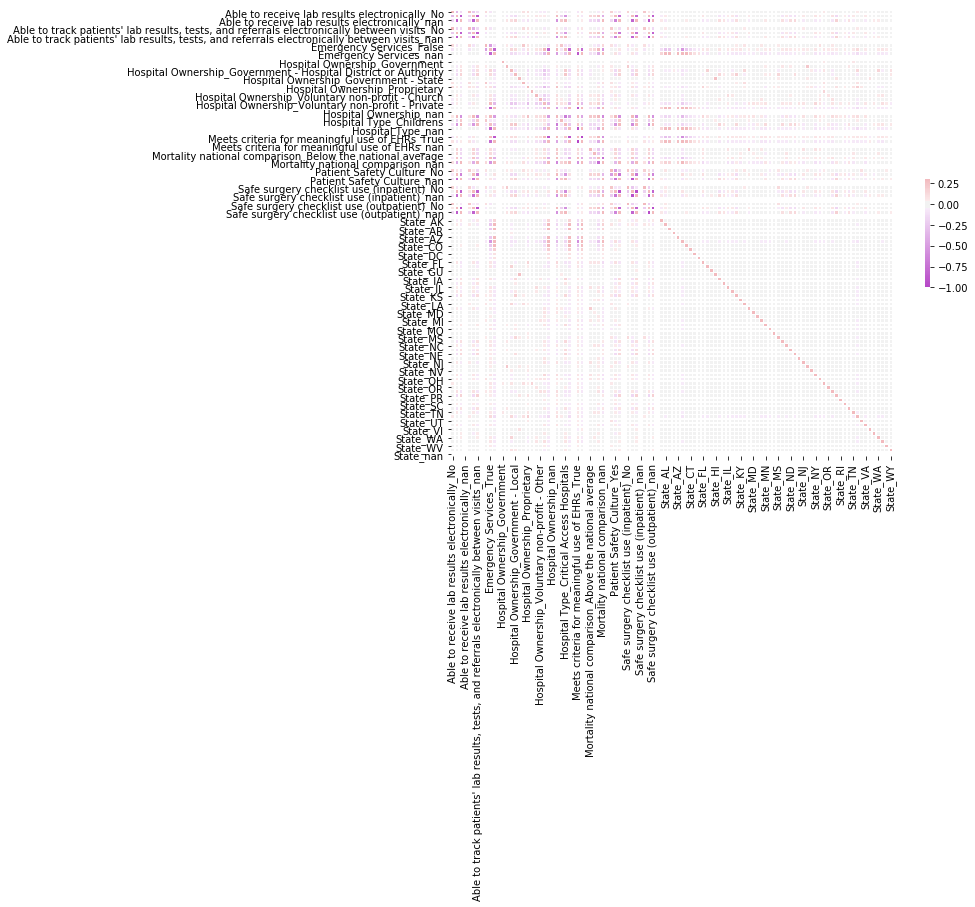

In [49]:
# TEST CORRLINEARILATIY 
corr = features.corr()

plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(300, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .2})
# Find a correlation table that is less complicated visually
plt.show()
# This heatmap is for understanding colinearality 

Minimize highly correlated variables

In [50]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.99)]

# Then drop those columns
features_fil = features.drop(to_drop_corr, axis=1)

In [51]:
print("After filling null values and dropping highly correlated features, we have:")
print(features_fil.shape, "features, a drop from",features.shape, "in the original encoded feature set.")

After filling null values and dropping highly correlated features, we have:
(4784, 87) features, a drop from (4784, 107) in the original encoded feature set.


In [52]:
# COMP_PAYM_90_HIP_KNEE_1                                                                    4784 non-null int32
# COMP_PAYM_90_HIP_KNEE_2                                                                    4784 non-null int32
# MORT_PAYM_30_HEART ATT_1                                                                   4784 non-null int32
# MORT_PAYM_30_HEART ATT_2                                                                   4784 non-null int32
# MORT_PAYM_30_HEART FAIL_1                                                                  4784 non-null int32
# MORT_PAYM_30_HEART FAIL_2                                                                  4784 non-null int32
# MORT_PAYM_30_PNEU_1                                                                        4784 non-null int32
# MORT_PAYM_30_PNEU_2

In [53]:
# PUT TARGET HERE
le = LabelEncoder()
labels = le.fit_transform(df.loc[:,"MORT_PAYM_30_PNEU_2"])

In [54]:
# Create a dictionary that can be related to later
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{' average payment': 0, ' higher payment': 1, ' lower payment': 2, 'nan': 3}


In [55]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features_fil, labels, test_size = 0.15, random_state = 42)

In [56]:
print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

(4066, 87)
(4066,)
(718, 87)
(718,)


In [57]:
# train_features.as_matrix()[0]

In [58]:
bernoulli_NB = BernoulliNB()
bernoulli_NB.fit(train_features,train_labels)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [59]:
predicted_labels = bernoulli_NB.predict(test_features)
predicted_probability = bernoulli_NB.predict_proba(test_features)

In [60]:
# Use classification_report to compare the test labels (what we know to be true) and the predicted labels generated by
# the B Naive Bayes
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       334
           1       0.34      0.46      0.39       114
           2       0.40      0.04      0.07       152
           3       0.48      0.81      0.61       118

   micro avg       0.50      0.50      0.50       718
   macro avg       0.45      0.48      0.41       718
weighted avg       0.49      0.50      0.45       718



In [61]:
print(metrics.confusion_matrix(test_labels, predicted_labels))

[[203  70   6  55]
 [ 45  52   1  16]
 [ 97  19   6  30]
 [  9  12   2  95]]


In [62]:
from sklearn import metrics

In [63]:
print("Accuracy:",metrics.accuracy_score(predicted_labels, test_labels))

Accuracy: 0.4958217270194986


> B Naive Bayes is a Poor predictor

## Develop Random Forest model to predict hospital ratings 

In [64]:
complete.iloc[:,19:31].columns

Index(['Payment for heart attack patients - actual',
       'Payment for heart failure patients - actual',
       'Payment for hip/knee replacement patients - actual',
       'Payment for pneumonia patients - actual',
       'Payment for heart attack patients - lower',
       'Payment for heart failure patients - lower',
       'Payment for hip/knee replacement patients - lower',
       'Payment for pneumonia patients - lower',
       'Payment for heart attack patients - higher',
       'Payment for heart failure patients - higher',
       'Payment for hip/knee replacement patients - higher',
       'Payment for pneumonia patients - higher'],
      dtype='object')

In [65]:
target = 'Hospital overall rating'

In [66]:
# 

In [67]:
# Create a copy of complete just to be safe
df_2 = complete.iloc[:, cat_index]
df_2 = pd.concat([df_2,complete.iloc[:,19:31]],axis=1)
df_2 = pd.concat([df_2,complete[target]],axis=1)
df_2 = pd.concat([df_2,complete['gross_inc_filer']],axis=1)

# Watch out for those nan which are not nan
df_2 = df_2.dropna(how="any").copy()

In [68]:
labels = df_2.loc[:,target].astype(int)

In [69]:
# labels.value_counts()

In [70]:
# Before doing one hot encoding, remove or handle features with too
# many factors such as Hospital Name, Address, and Zip Code
features = df_2[df_2.columns.difference(df_2.columns[6:14])]
to_drop = ["Hospital name","Address","ZIP Code","County name","City"]
features = features.drop(to_drop,axis=1)
features = features.drop(target,axis=1)

# Finally, turn into dummies vars
features = pd.get_dummies(features, dummy_na= True)

# features.info()

In [71]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.15, random_state = 42)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)

In [73]:
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
predicted_labels = rf.predict(test_features)

In [75]:
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           1       0.33      0.07      0.12        28
           2       0.36      0.39      0.37        64
           3       0.37      0.48      0.42        69
           4       0.34      0.36      0.35        58
           5       0.11      0.06      0.08        17

   micro avg       0.35      0.35      0.35       236
   macro avg       0.30      0.27      0.27       236
weighted avg       0.34      0.35      0.33       236



In [76]:
print("Accuracy:",metrics.accuracy_score(predicted_labels, test_labels))

Accuracy: 0.3474576271186441


In [77]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = list(features.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20}  ---  Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Payment for heart attack patients - actual  ---  Importance: 0.06
Variable: Payment for heart attack patients - higher  ---  Importance: 0.06
Variable: Payment for heart attack patients - lower  ---  Importance: 0.06
Variable: Payment for heart failure patients - actual  ---  Importance: 0.06
Variable: Payment for heart failure patients - higher  ---  Importance: 0.06
Variable: Payment for heart failure patients - lower  ---  Importance: 0.06
Variable: Payment for hip/knee replacement patients - actual  ---  Importance: 0.06
Variable: Payment for hip/knee replacement patients - higher  ---  Importance: 0.06
Variable: Payment for hip/knee replacement patients - lower  ---  Importance: 0.06
Variable: Payment for pneumonia patients - actual  ---  Importance: 0.06
Variable: Payment for pneumonia patients - higher  ---  Importance: 0.06
Variable: Payment for pneumonia patients - lower  ---  Importance: 0.06
Variable: gross_inc_filer       ---  Importance: 0.06
Variable: Hospital O

### Model Results

B Bayes works relatively bad with Predicting the following:
- Complications due to Hip Replacement - COMP_PAYM_90_HIP_KNEE_1
- Payment to patients for Hip Replacement - COMP_PAYM_90_HIP_KNEE_2
- Mortality for patients due to Heart failure - MORT_PAYM_30_HEART FAIL_1 
- Payment to patients for Heart failure - MORT_PAYM_30_HEART FAIL_2 
- Mortality for patients due to Pneumonia - MORT_PAYM_30_PNEU_1 
- Payment to patients for Pneumonia - MORT_PAYM_30_PNEU_2

## Train a Logit model

In [78]:
# Prevent continuous variables from skewing results
from sklearn.preprocessing import MinMaxScaler

mi_max = MinMaxScaler()

features_float = features.select_dtypes(include=['float64'])
float_list = list(features_float.columns)
features_float.head(2)
features_float.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1573 entries, 330049 to 150009
Data columns (total 13 columns):
Payment for heart attack patients - actual            1573 non-null float64
Payment for heart attack patients - higher            1573 non-null float64
Payment for heart attack patients - lower             1573 non-null float64
Payment for heart failure patients - actual           1573 non-null float64
Payment for heart failure patients - higher           1573 non-null float64
Payment for heart failure patients - lower            1573 non-null float64
Payment for hip/knee replacement patients - actual    1573 non-null float64
Payment for hip/knee replacement patients - higher    1573 non-null float64
Payment for hip/knee replacement patients - lower     1573 non-null float64
Payment for pneumonia patients - actual               1573 non-null float64
Payment for pneumonia patients - higher               1573 non-null float64
Payment for pneumonia patients - lower                1

In [79]:
features_float_scaled = pd.DataFrame(mi_max.fit_transform(features_float),columns=float_list).reset_index()
features_float_scaled.head(5)
features_float_scaled.shape

(1573, 14)

In [80]:
features_non_float = features.select_dtypes(exclude=['float64']).reset_index()
features_non_float.head(4)
features_non_float.shape

(1573, 87)

In [81]:
features = pd.concat([features_non_float,features_float_scaled], axis=1).drop('Provider ID', axis=1)
features.head(4)
# MIND THE INDEX after doing all that shit.

,Able to receive lab results electronically_No,Able to receive lab results electronically_Yes,Able to receive lab results electronically_nan,Able to receive lab results electronically_nan,"Able to track patients' lab results, tests, and referrals electronically between visits_No","Able to track patients' lab results, tests, and referrals electronically between visits_Yes","Able to track patients' lab results, tests, and referrals electronically between visits_nan","Able to track patients' lab results, tests, and referrals electronically between visits_nan",Emergency Services_False,Emergency Services_True,...,Payment for heart failure patients - actual,Payment for heart failure patients - higher,Payment for heart failure patients - lower,Payment for hip/knee replacement patients - actual,Payment for hip/knee replacement patients - higher,Payment for hip/knee replacement patients - lower,Payment for pneumonia patients - actual,Payment for pneumonia patients - higher,Payment for pneumonia patients - lower,gross_inc_filer
0,0,1,0,0,0,1,0,0,0,1,...,0.388817,0.393675,0.390426,0.135670,0.112783,0.146545,0.282894,0.255330,0.314370,0.188685
1,0,1,0,0,0,1,0,0,0,1,...,0.493239,0.423263,0.568827,0.589452,0.527197,0.593812,0.515802,0.431107,0.614973,0.036577
2,0,1,0,0,0,1,0,0,0,1,...,0.011483,0.011641,0.013076,0.325077,0.335950,0.278289,0.023273,0.019162,0.058132,0.081552
3,0,1,0,0,0,1,0,0,0,1,...,0.243936,0.222255,0.277875,0.418123,0.388839,0.401585,0.400887,0.398258,0.418300,0.050351


In [82]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.15, random_state = 42)

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_features, train_labels)

c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
predicted_labels = logreg.predict(test_features)

In [85]:
# confusion_matrix = confusion_matrix(test_labels, predicted_labels)
# print(confusion_matrix)

In [86]:
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           1       0.57      0.14      0.23        28
           2       0.44      0.53      0.48        64
           3       0.37      0.42      0.39        69
           4       0.34      0.40      0.37        58
           5       0.17      0.06      0.09        17

   micro avg       0.39      0.39      0.39       236
   macro avg       0.38      0.31      0.31       236
weighted avg       0.39      0.39      0.37       236



In [87]:
print("Accuracy:",metrics.accuracy_score(predicted_labels, test_labels))

Accuracy: 0.3855932203389831


## Integrate into an application - pickling the models for later use

In [88]:
#Use joblib to save the logreg model for later use'
filename = 'finalized_bernoulli_NB_model.sav'
joblib.dump(bernoulli_NB, filename)

['finalized_bernoulli_NB_model.sav']

In [89]:
#Use joblib to save the logreg model for later use'
filename = 'finalized_logreg_model.sav'
joblib.dump(logreg, filename)

['finalized_logreg_model.sav']